In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Prep

In [3]:
df = df[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']]

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical: 
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [5]:
nan_columns = df.columns[df.isnull().any()]

for c in nan_columns:
    df[c] = df[c].fillna(0)

#Check if all columns don't have missing values 
df.isnull().any()

make                 False
model                False
year                 False
engine_hp            False
engine_cylinders     False
transmission_type    False
vehicle_style        False
highway_mpg          False
city_mpg             False
msrp                 False
dtype: bool

In [6]:
df['above_average'] = (df.msrp > df.msrp.mean()).astype(int)
df1 = df.drop(['msrp'], axis= 1 )
df1.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0


In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [9]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [10]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
     

# Question 1

In [12]:
numerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']

for n in numerical:
    auc = roc_auc_score(y_train, df_train[n])
    if auc < 0.5: 
        auc = roc_auc_score(y_train, -df_train[n])
    print('%s, %.3f' % (n, auc))

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
city_mpg, 0.673


# Question 2:

In [14]:
train_dicts = df_train[categorical + numerical].to_dict(orient= 'records')
dv = DictVectorizer(sparse= False)
X_train = dv.fit_transform(train_dicts)

lr = LogisticRegression(solver= 'liblinear',C= 1.0, max_iter= 1000)
lr.fit(X_train,y_train)

val_dicts = df_val[categorical + numerical].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

y_pred = lr.predict_proba(X_val)[:, 1]

In [15]:
roc_auc_score(y_val, y_pred).round(3)

0.982

# Question 3:

In [17]:
def confusion_matrix(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


df_scores = confusion_matrix(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,646,343,8,1386
20,0.2,628,206,26,1523
30,0.3,609,133,45,1596
40,0.4,601,89,53,1640
50,0.5,581,63,73,1666
60,0.6,554,44,100,1685
70,0.7,515,24,139,1705
80,0.8,467,11,187,1718
90,0.9,372,4,282,1725


In [18]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

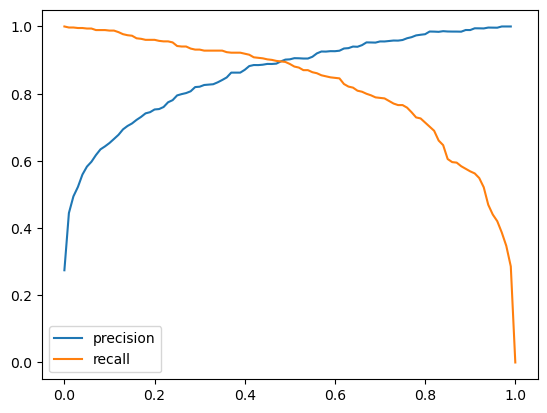

In [19]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.legend()
plt.show()

# Question 4: 

In [20]:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

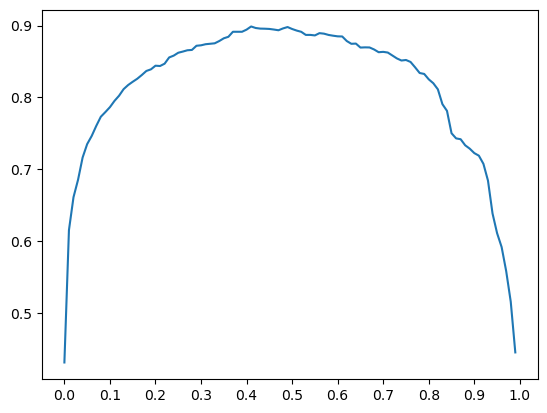

In [21]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

# Question 5: 

In [38]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [54]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter= 1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [60]:
scores = []
for train_idx, val_idx in kf.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print('mean: %.3f std: %.3f' % (np.mean(scores), np.std(scores)))
     

mean: 0.982 std: 0.000
mean: 0.983 std: 0.001
mean: 0.983 std: 0.001
mean: 0.983 std: 0.001
mean: 0.984 std: 0.002


In [61]:
scores = []

for C in [0.01, 0.1, 0.5, 10]:
    for train_idx, val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C: %s mean: %.3f std: %.3f' % (C, np.mean(scores), np.std(scores)))
     

C: 0.01 mean: 0.938 std: 0.002
C: 0.1 mean: 0.956 std: 0.018
C: 0.5 mean: 0.965 std: 0.019
C: 10 mean: 0.970 std: 0.019
